# Name: Shweta Ghadshi
# Roll No: 21102B0017
# Branch: BE CMPN B

In [45]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [46]:
# fetch dataset
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80)

In [47]:
print(optical_recognition_of_handwritten_digits.metadata)

{'uci_id': 80, 'name': 'Optical Recognition of Handwritten Digits', 'repository_url': 'https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits', 'data_url': 'https://archive.ics.uci.edu/static/public/80/data.csv', 'abstract': 'Two versions of this database available; see folder', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 5620, 'num_features': 64, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Wed Aug 23 2023', 'dataset_doi': '10.24432/C50P49', 'creators': ['E. Alpaydin', 'C. Kaynak'], 'intro_paper': {'ID': 280, 'type': 'NATIVE', 'title': 'Methods of Combining Multiple Classifiers and Their Applications to Handwritten Digit Recognition', 'authors': 'C. Kaynak', 'venue': 'MSc Thesis, Institute of Graduate Studies in Science and Engineering, 

In [48]:
# variable information
print(optical_recognition_of_handwritten_digits.variables)

           name     role         type demographic description units  \
0    Attribute1  Feature      Integer        None        None  None   
1    Attribute2  Feature      Integer        None        None  None   
2    Attribute3  Feature      Integer        None        None  None   
3    Attribute4  Feature      Integer        None        None  None   
4    Attribute5  Feature      Integer        None        None  None   
..          ...      ...          ...         ...         ...   ...   
60  Attribute61  Feature      Integer        None        None  None   
61  Attribute62  Feature      Integer        None        None  None   
62  Attribute63  Feature      Integer        None        None  None   
63  Attribute64  Feature      Integer        None        None  None   
64        class   Target  Categorical        None        None  None   

   missing_values  
0              no  
1              no  
2              no  
3              no  
4              no  
..            ...  
60     

In [49]:
X = optical_recognition_of_handwritten_digits.data.features
y = optical_recognition_of_handwritten_digits.data.targets

In [50]:
print(X.head())

   Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
0           0           1           6          15          12           1   
1           0           0          10          16           6           0   
2           0           0           8          15          16          13   
3           0           0           0           3          11          16   
4           0           0           5          14           4           0   

   Attribute7  Attribute8  Attribute9  Attribute10  ...  Attribute55  \
0           0           0           0            7  ...            0   
1           0           0           0            7  ...            3   
2           0           0           0            1  ...            0   
3           0           0           0            0  ...            0   
4           0           0           0            0  ...           12   

   Attribute56  Attribute57  Attribute58  Attribute59  Attribute60  \
0            0            0       

In [51]:
print(y.head())

   class
0      0
1      0
2      7
3      4
4      6


In [52]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

In [53]:
pca = PCA()

# Fit PCA on standardized data
X_pca = pca.fit_transform(X_standardized)

# Check the cumulative explained variance to decide the number of components
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()
print("Cumulative Explained Variance Ratio:", cumulative_variance)

Cumulative Explained Variance Ratio: [0.11605858 0.21776012 0.29578208 0.35416783 0.40289661 0.44732826
 0.48591603 0.51988484 0.54835511 0.57499588 0.60079113 0.62475518
 0.64771937 0.66868574 0.68853981 0.70779894 0.72619482 0.74410589
 0.76021608 0.7755831  0.78998642 0.80349975 0.81613417 0.82750748
 0.83777752 0.84791389 0.85775688 0.86699965 0.8757871  0.88402485
 0.89207633 0.89938353 0.90650409 0.91280906 0.91896946 0.92500517
 0.93055726 0.93569057 0.94063992 0.94516412 0.94955125 0.95365744
 0.95759149 0.96110151 0.96454448 0.96781617 0.9709732  0.97385042
 0.97651033 0.97911455 0.98161809 0.98403785 0.98625218 0.9883185
 0.99021382 0.9920628  0.99373637 0.99531479 0.9967484  0.99801059
 0.99905697 1.         1.         1.        ]


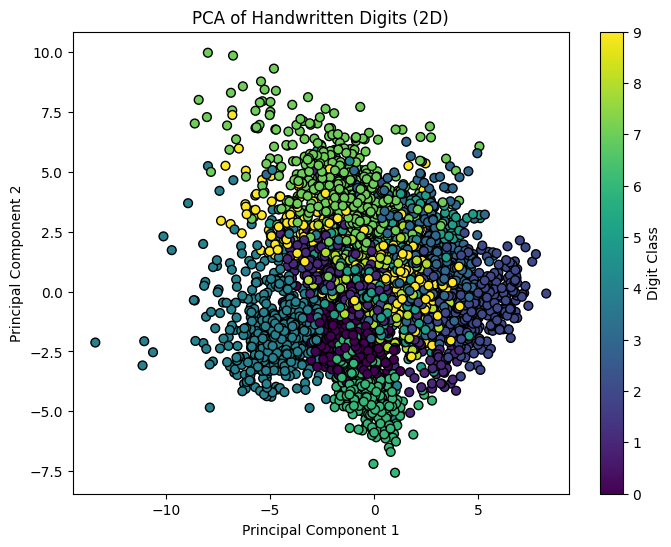

In [54]:
pca_2d = PCA(n_components=2)  # Reduce to 2 dimensions
X_pca_2d = pca_2d.fit_transform(X_standardized)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y.to_numpy(), cmap='viridis', edgecolor='k', s=40)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Handwritten Digits (2D)')
plt.colorbar(label='Digit Class')  # Add color bar to indicate digit classes
plt.show()

In [55]:
explained_variance_ratio = pca_2d.explained_variance_ratio_
print("Explained variance by each principal component:", explained_variance_ratio)
print("Cumulative explained variance:", explained_variance_ratio.cumsum())

Explained variance by each principal component: [0.11605858 0.10170154]
Cumulative explained variance: [0.11605858 0.21776012]


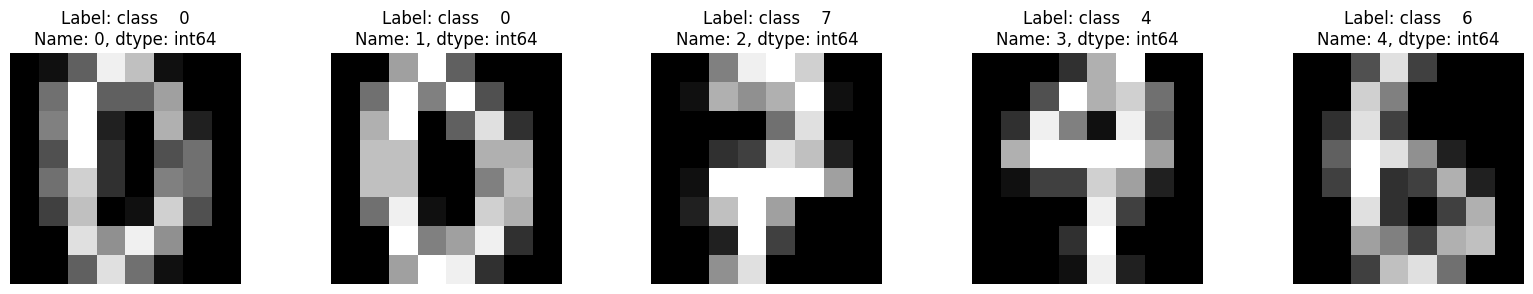

In [56]:
fig, axes = plt.subplots(1, 5, figsize=(20, 3))
for i, ax in enumerate(axes):
    ax.imshow(X.iloc[i].values.reshape(8, 8), cmap='gray')
    ax.set_title(f'Label: {y.iloc[i]}')
    ax.axis('off')
plt.show()